
# Leonardo Fernandes Oliveira 8517421
# André Pousa

<ul>
    <li> 1 - ok
    <li> 2 - ok
    <li> 3 - ok
    <li> 4 - ok
    <li> 5 - falta comentar
    <li> 6 - netcarto, comentar e fazer normalized mutual information.. nao consegui fazer o normalized mutual information, assim como no ex 8, porque nao consegui rodar a biblioteca community
    <li> 7 - falta comentar
    <li> 8 - os códigos estão aí. nao consigo rodar por nao conseguir rodar a bibliotca community
    <li> 9 - falta comentar
    <li> 10 - ok
<ul>
  

In [4]:

# !apt-get install -qq curl g++ make
# !curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
# import os
# os.chdir('spatialindex-src-1.8.5')
# !./configure
# !make 
# !make install 
# !pip install osmnx
# !ldconfig


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from numpy import *
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
def plot_unw_graph(G, k=20, save_path=False, title=None, labels=True):
    labels = G.nodes()
    pos = nx.spring_layout(G, k=k/np.sqrt(G.order()))
    nx.draw(G, pos, node_color='b', edge_color='b',
                 width=1.0, with_labels=labels)
    if title:
        plt.title(title)
    if save_path:
        plt.savefig(save_path, dpi=100)
    plt.show()

def threshold_graph(G, T):
    tresholded_G = nx.Graph()
    for u, v, w in G.edges(data=True):
        if w['weight'] > T:
            tresholded_G.add_edge(u, v)
    return tresholded_G

def plot_edge_graph(G, k=20, weights_col='weight', save_path=False, title=None, labels=True):
    edges, weights = zip(*nx.get_edge_attributes(G,weights_col).items())
    pos = nx.spring_layout(G, k=k/np.sqrt(G.order()))
    nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights,
                 width=1.0, edge_cmap=plt.cm.Blues, with_labels=labels)
    if title:
        plt.title(title)
    plt.show()
    if save_path:
        plt.savefig(save_path, dpi=100)
        
nets_folder = 'C:\\Users\\Leonardo\\Documents\\Faculdade\\Redes Complexas\\projeto2\\nets'


## Funções auxiliares

In [5]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
        Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk


def plot_degree_distribution(G):
    degree_distribution = list(dict(G.degree()).values())
    plt.hist(degree_distribution, density=True)
    plt.xlabel("k")
    plt.ylabel("P(k)")
    plt.show()

def plot_metric_distribution(metric, metric_name, network_name):
    plt.hist(metric, density=True)
    plt.title('{} distribution - {}'.format(metric_name, network_name))
    plt.xlabel(metric_name)
    plt.ylabel("P({})".format(metric_name))
    plt.show()
  
def moment_degree_dist(G, m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M
  
def complexity(G):
    return moment_degree_dist(G, 2) / moment_degree_dist(G, 1)

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H


## Lendo as redes para os exercícios seguintes

In [6]:
from networkx.readwrite.gml import read_gml

celegans_neural = read_gml(nets_folder+'/celegansneural.gml')
celegans_neural = nx.DiGraph(celegans_neural)
#plot_edge_graph(celegans_neural, weights_col='value', title='Celegans Neural Network')

eroad = nx.read_edgelist(nets_folder+"/euroroad.txt", nodetype=int, data=(('weight',float),))
eroad = max(nx.connected_component_subgraphs(eroad), key=len)
#plot_unw_graph(eroad, title="E-Road Network")

hams = nx.read_edgelist(nets_folder+"/hamster.txt", nodetype=int, data=(('weight',float),))
hams = max(nx.connected_component_subgraphs(hams), key=len)  # largest component
#plot_unw_graph(hams, title="Hamsterster Network")

us_airports = nx.read_edgelist(nets_folder+"/usairport.txt", nodetype=int, data=(('weight',float),))
us_airports = max(nx.connected_component_subgraphs(us_airports), key=len)  # largest component
# plot_unw_graph(us_airport, title="US Airports Network", labels=False)

human_protein = nx.read_edgelist(nets_folder+"/humanprotein.txt", nodetype=int, data=(('weight',float),))
human_protein = max(nx.connected_component_subgraphs(human_protein), key=len)  # largest component

celegans_2004 = nx.read_edgelist(nets_folder+"/wi2004.txt", nodetype=str, data=(('weight',float),))
celegans_2004 = max(nx.connected_component_subgraphs(celegans_2004), key=len)  # largest component

celegans_2007 = nx.read_edgelist(nets_folder+"/wi2007.txt", nodetype=str, data=(('weight',float),))
celegans_2007 = max(nx.connected_component_subgraphs(celegans_2007), key=len)  # largest component

us_powergrid = read_gml(nets_folder+'/power.gml', label='id')
us_powergrid = nx.DiGraph(us_powergrid)

r_dep = nx.read_edgelist(nets_folder+'/dependencies.csv', delimiter=',')
r_dep = nx.DiGraph(r_dep)




## Exercício 1 

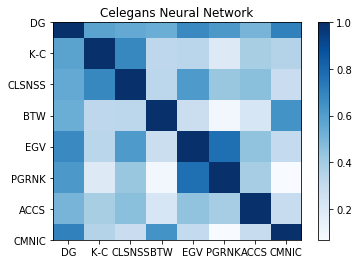

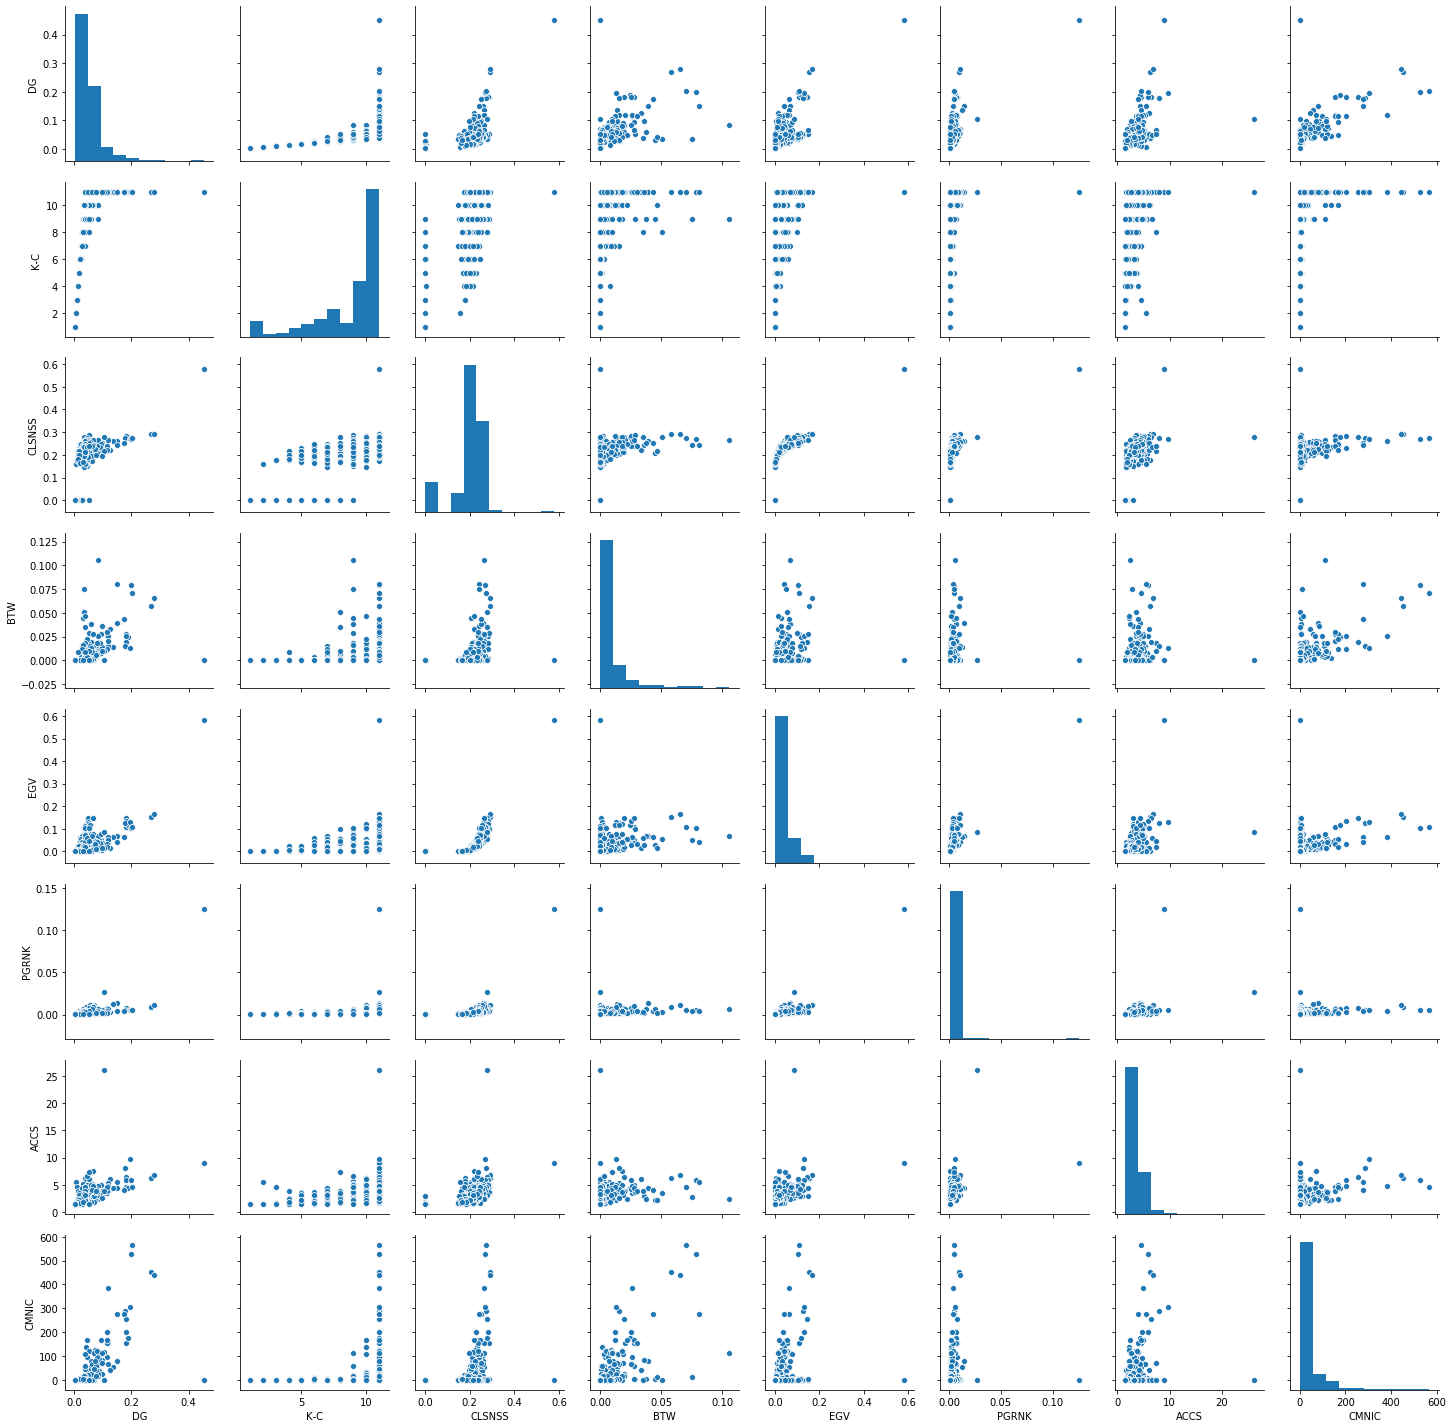

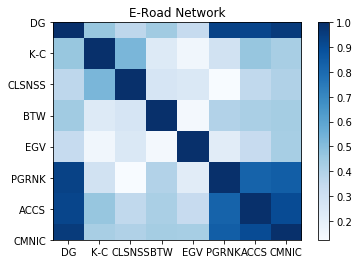

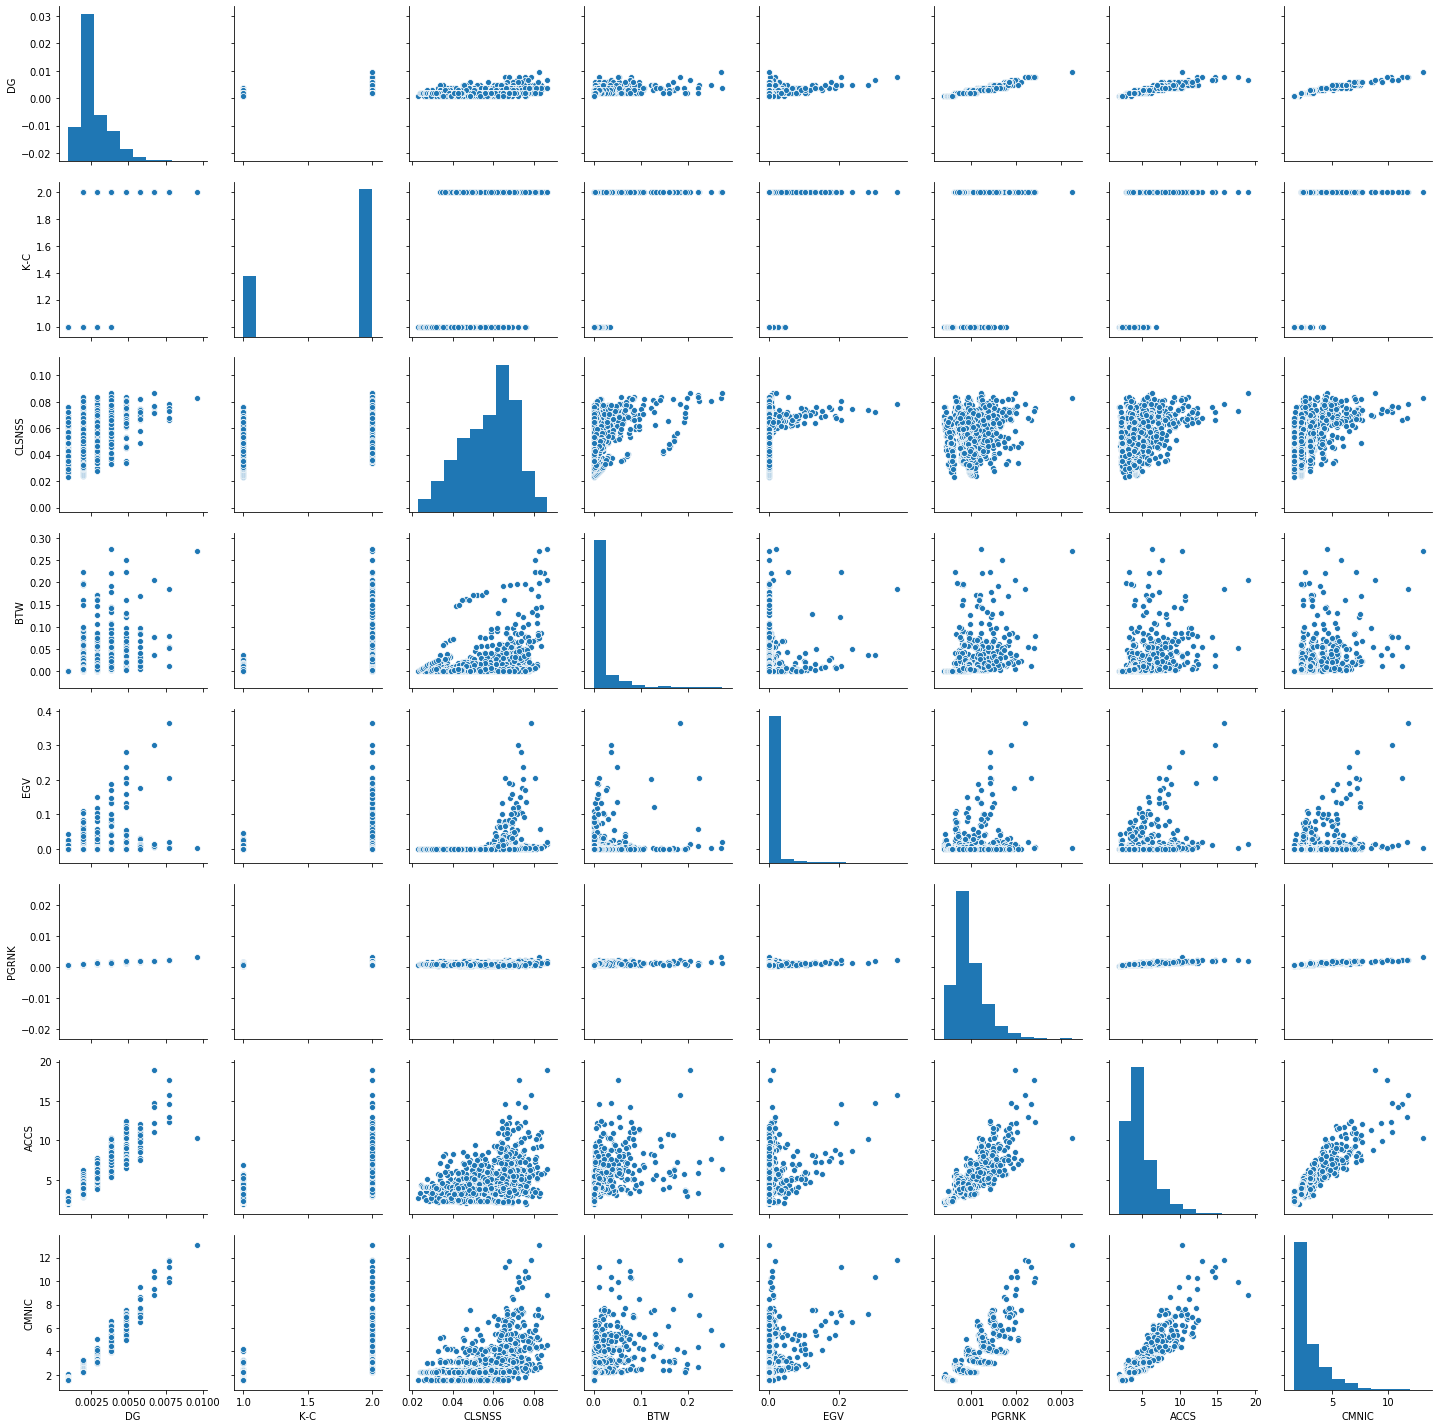

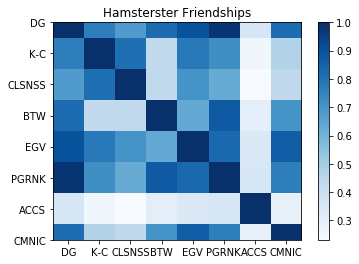

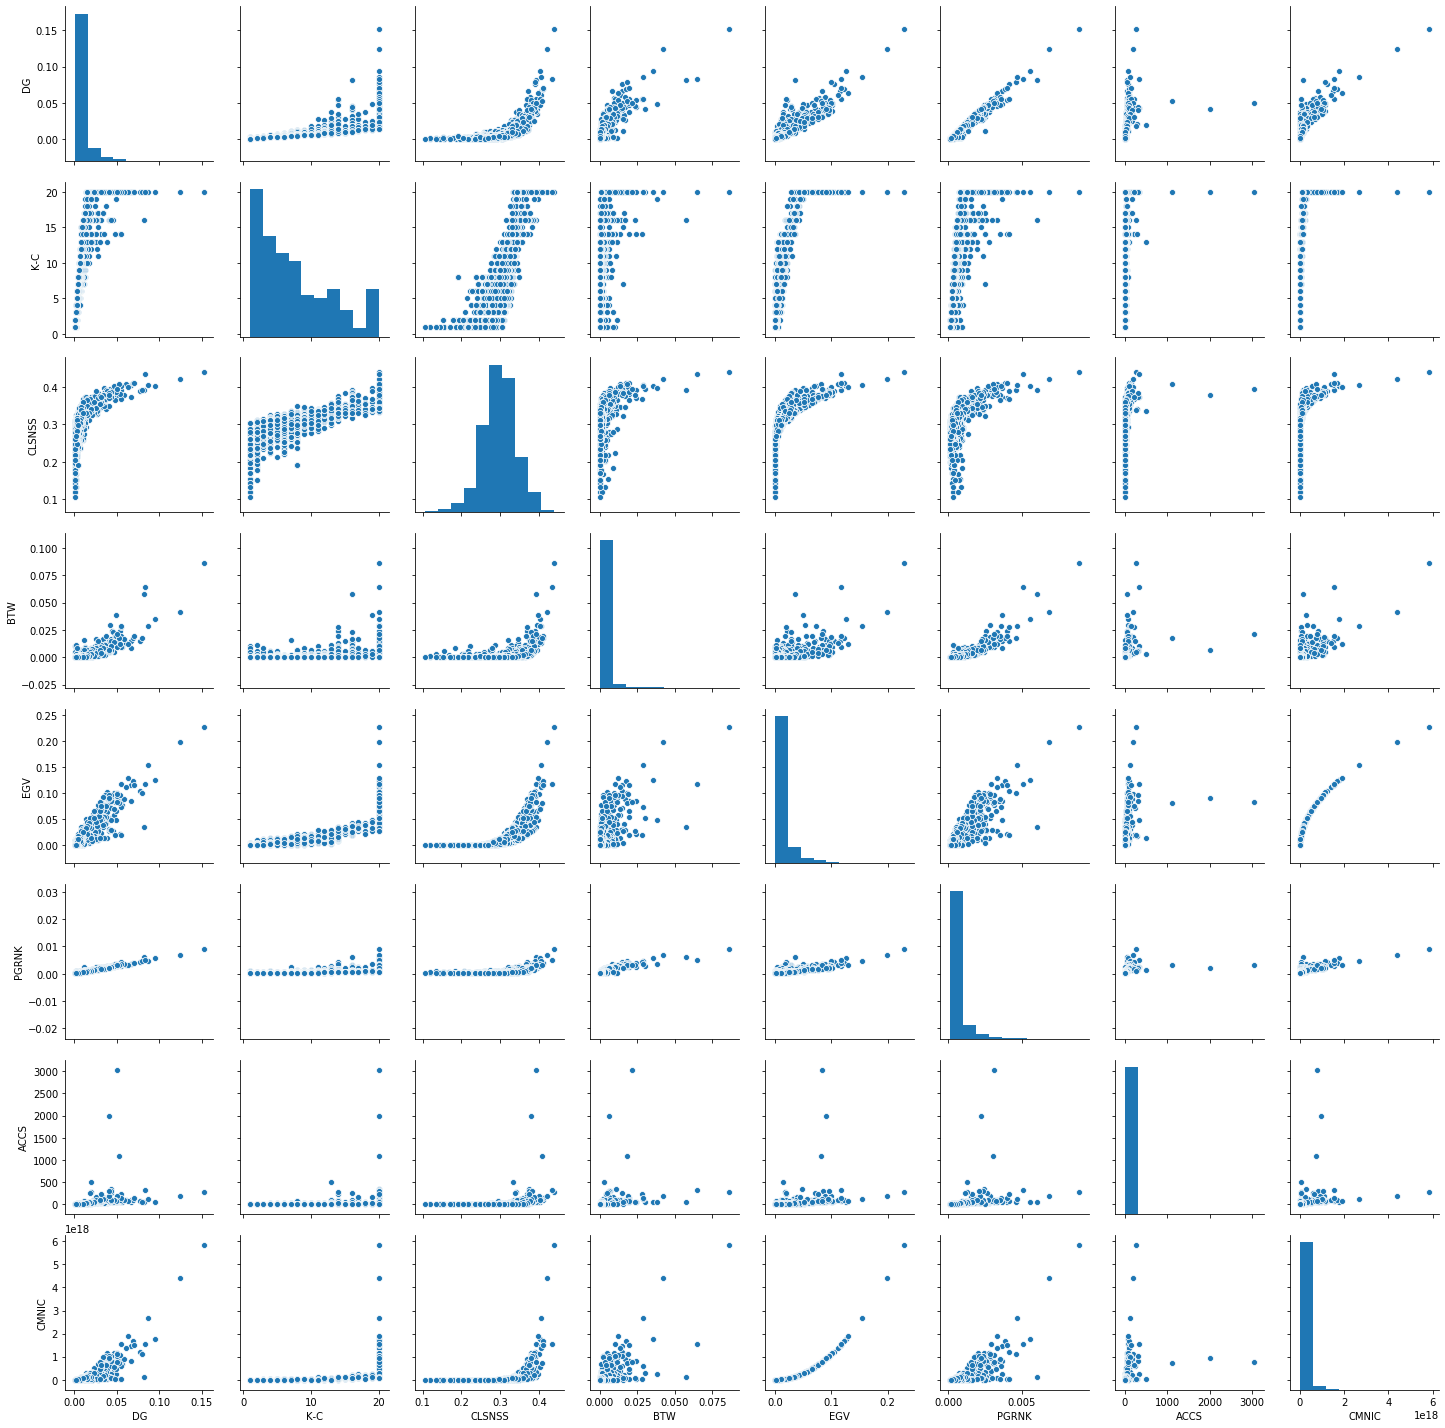

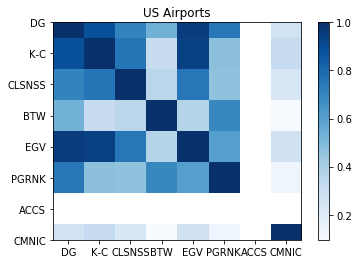

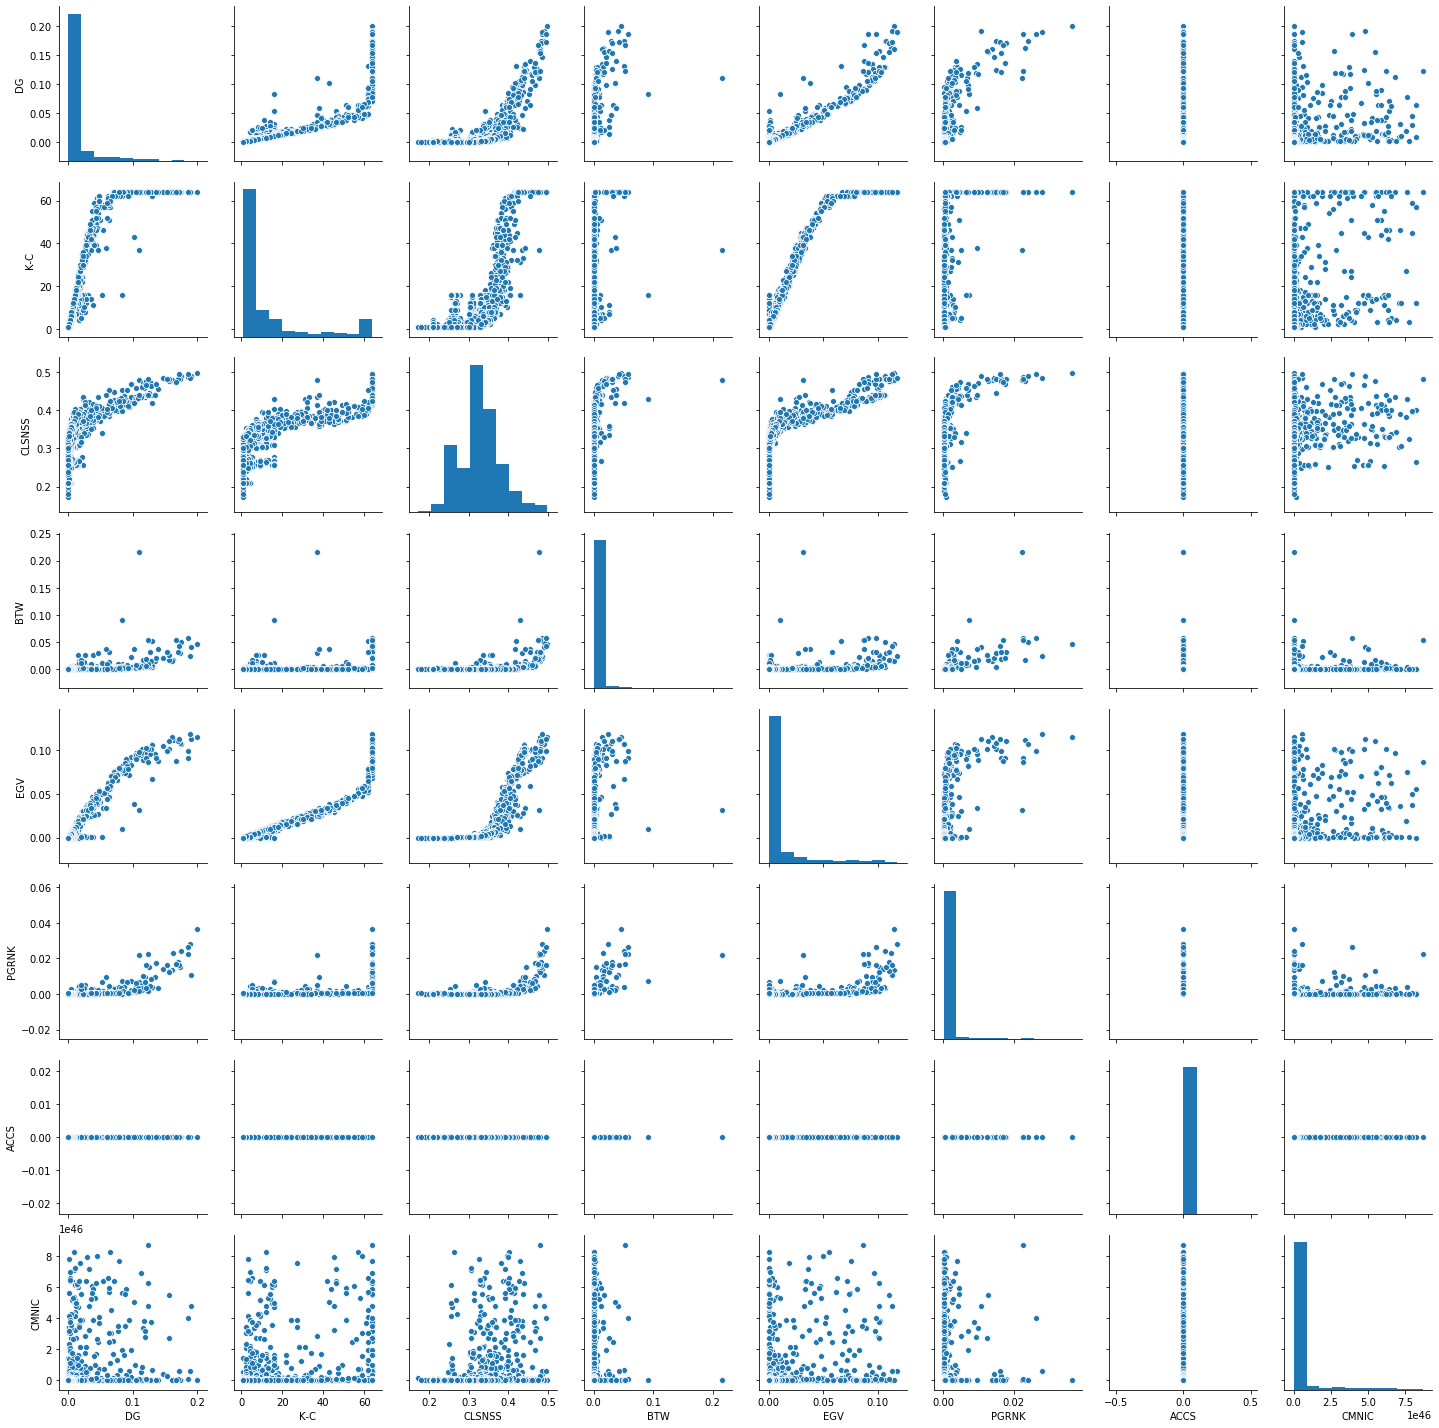

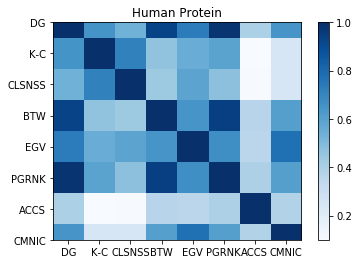

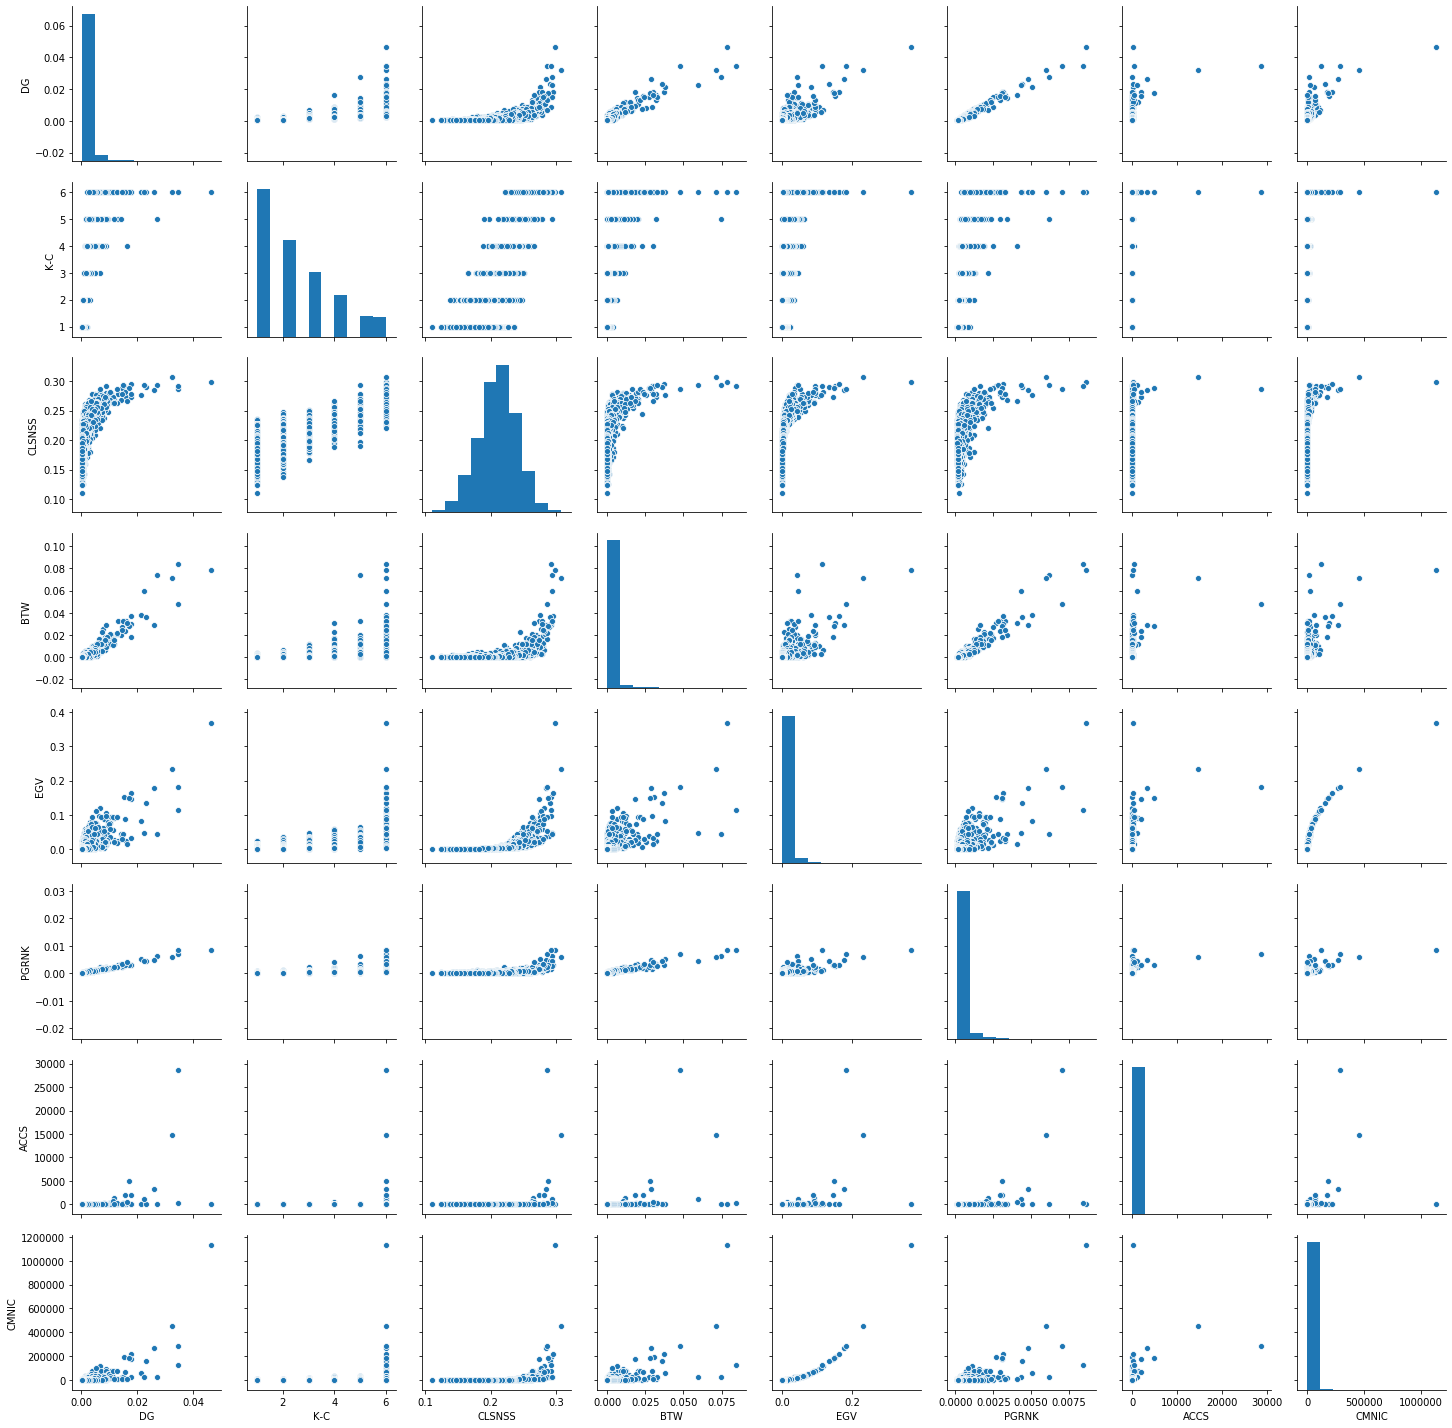

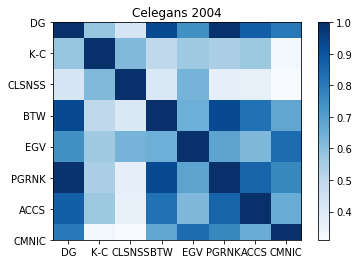

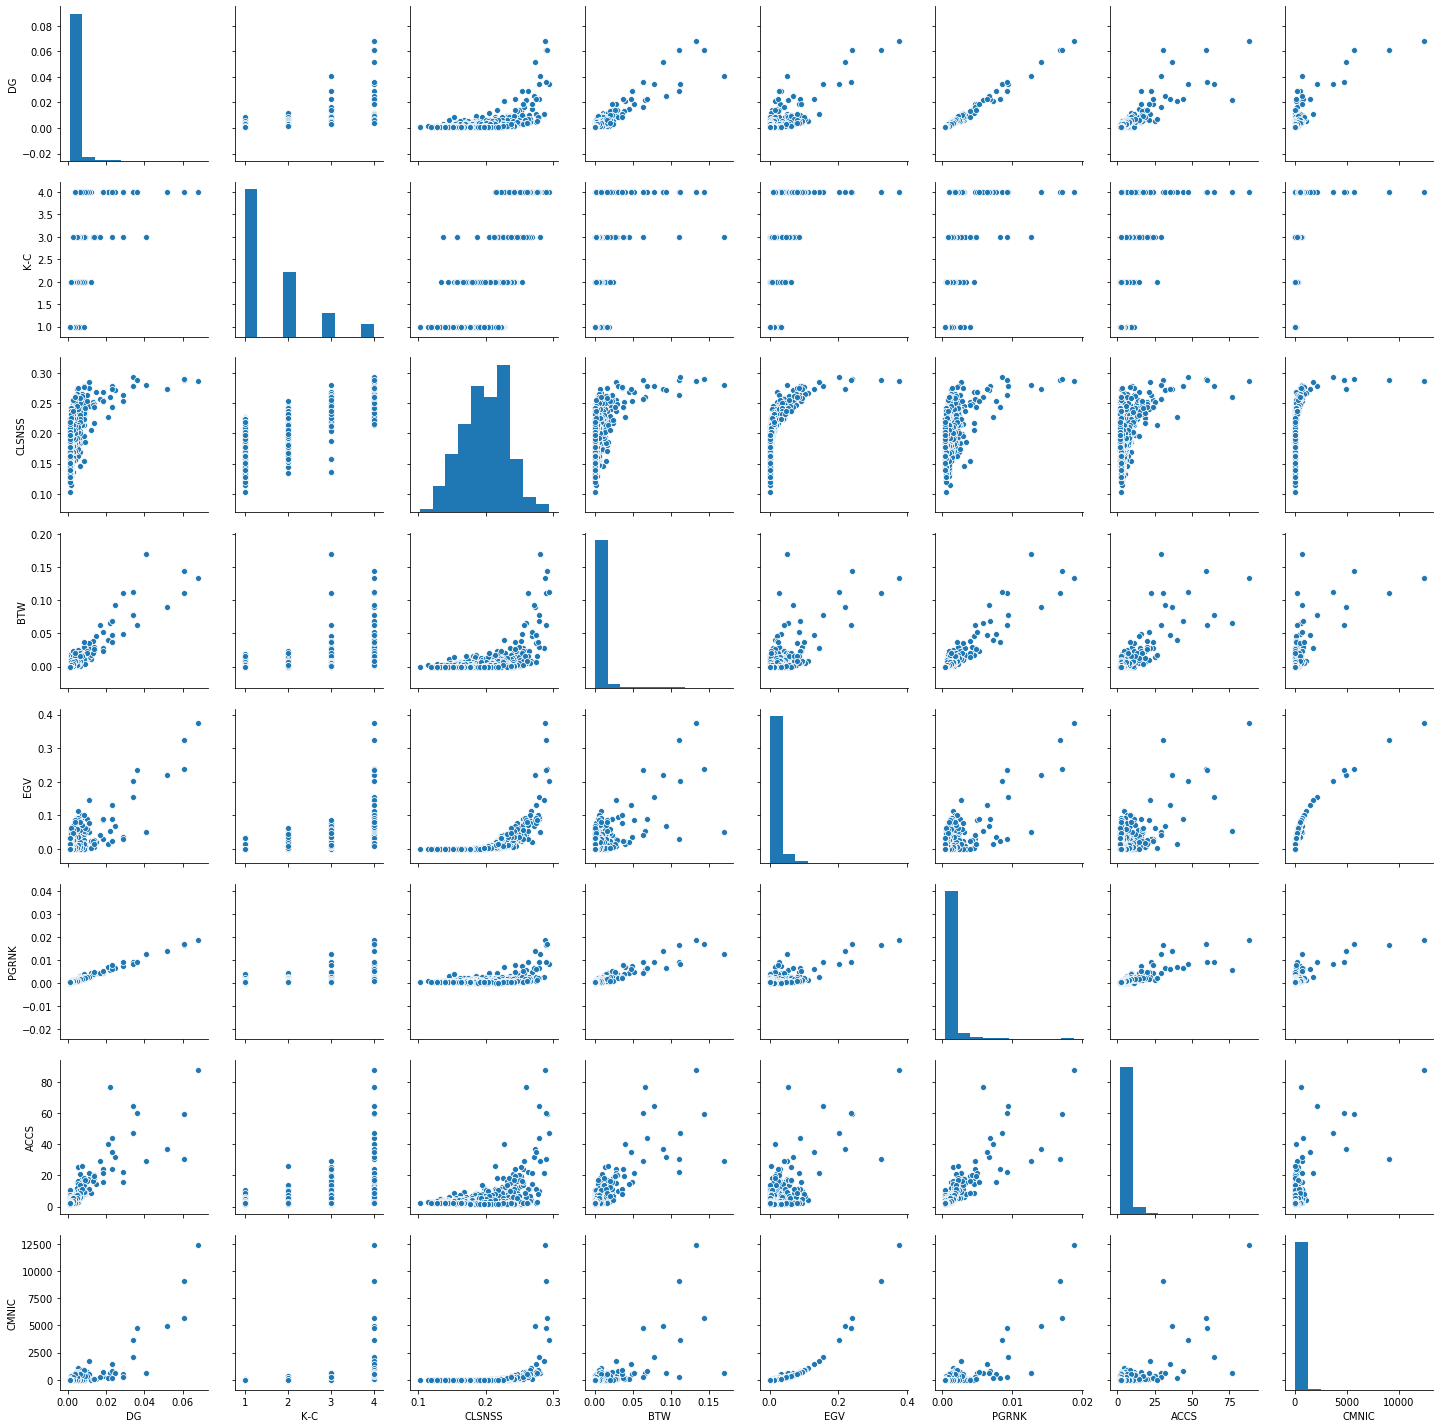

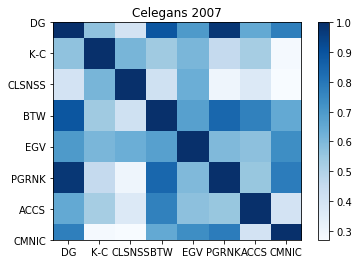

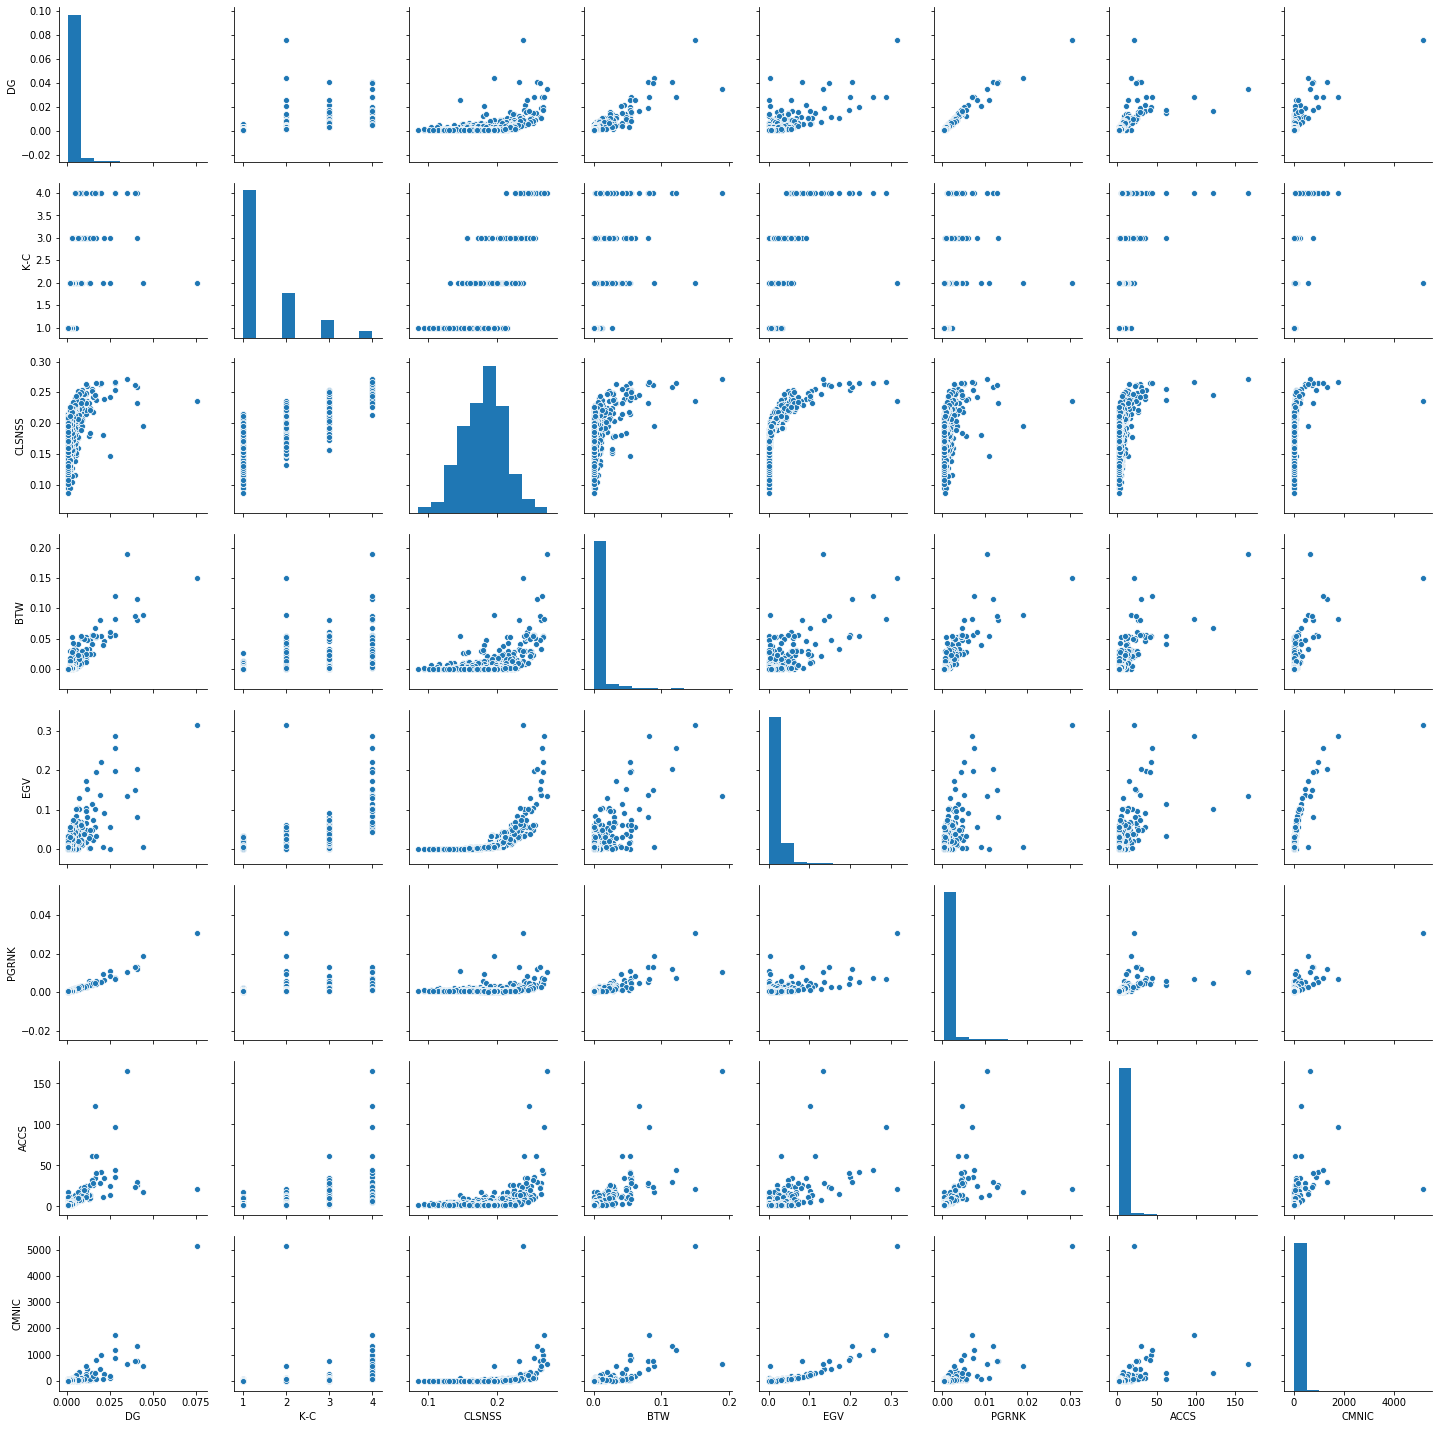

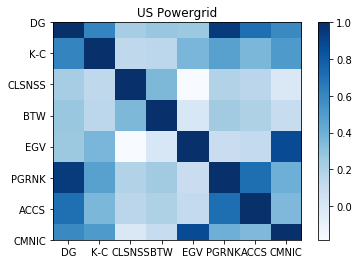

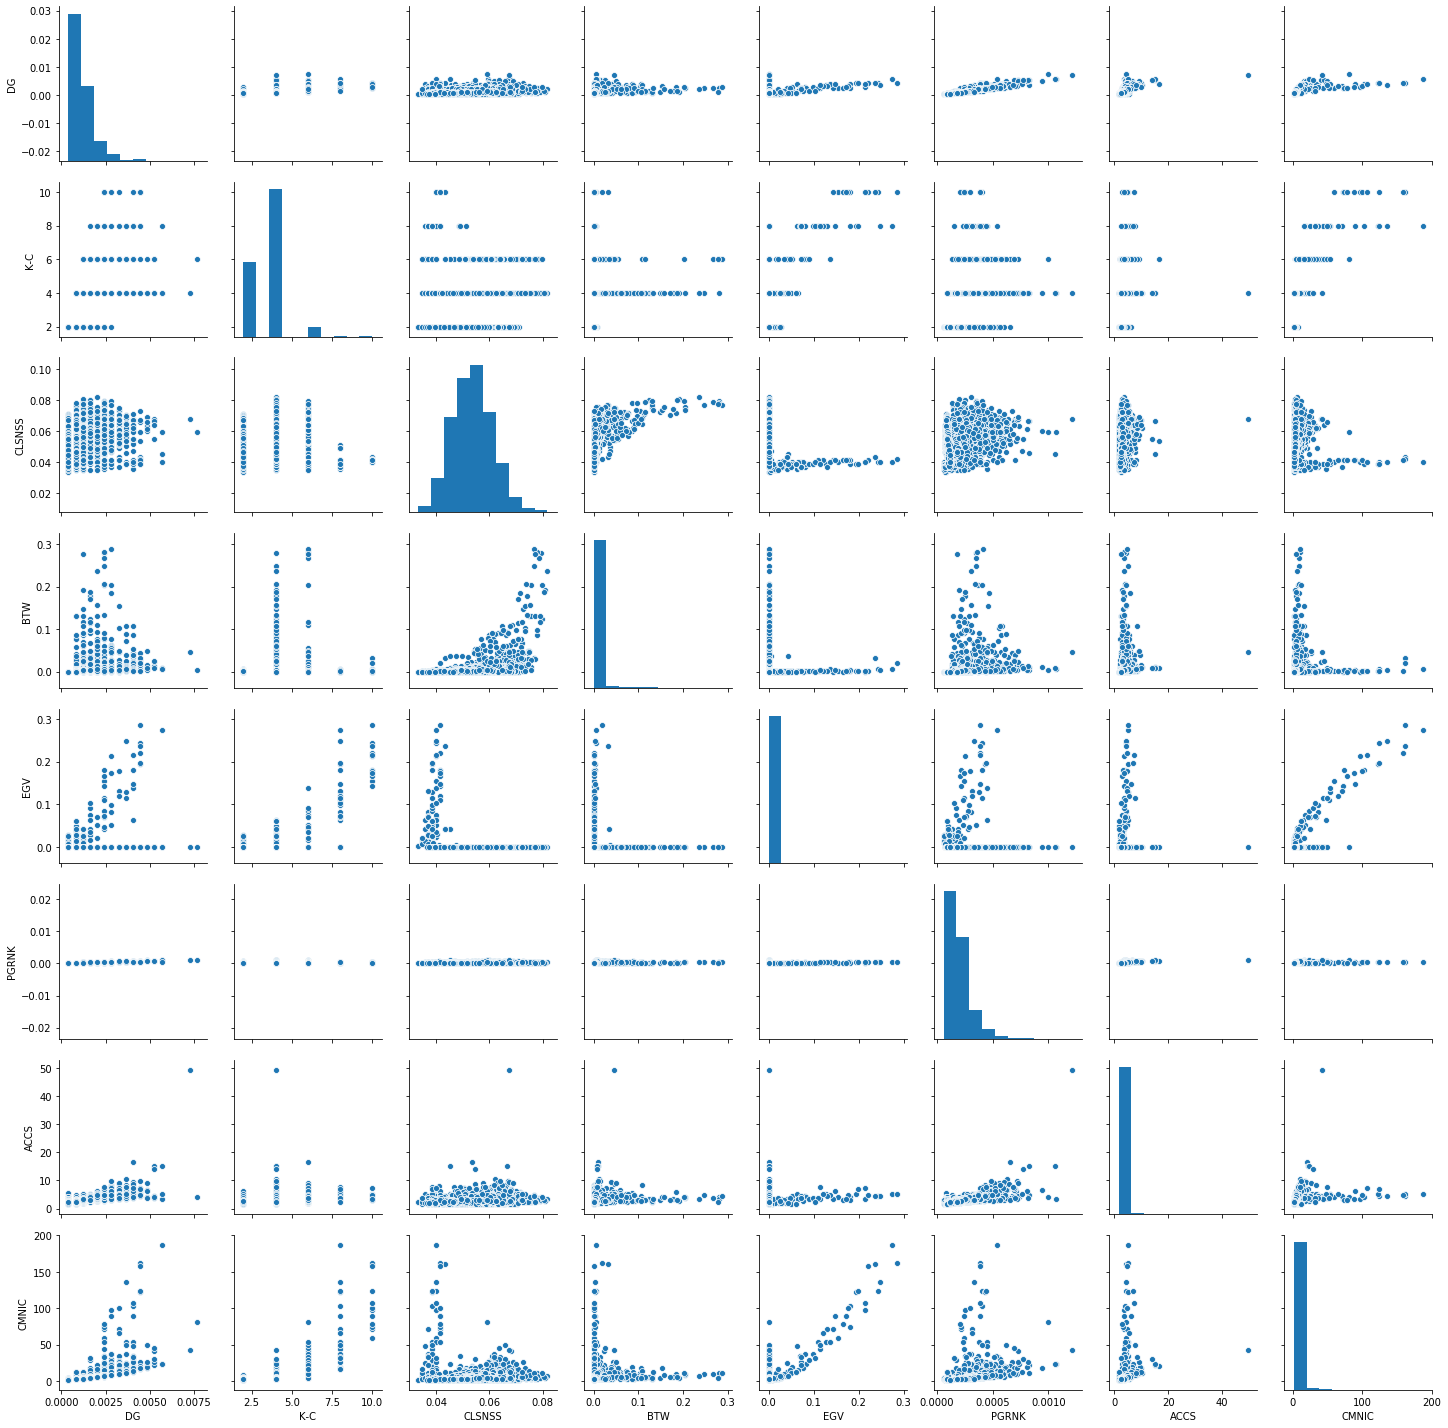

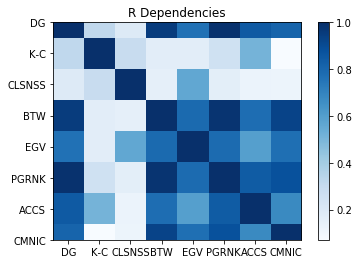

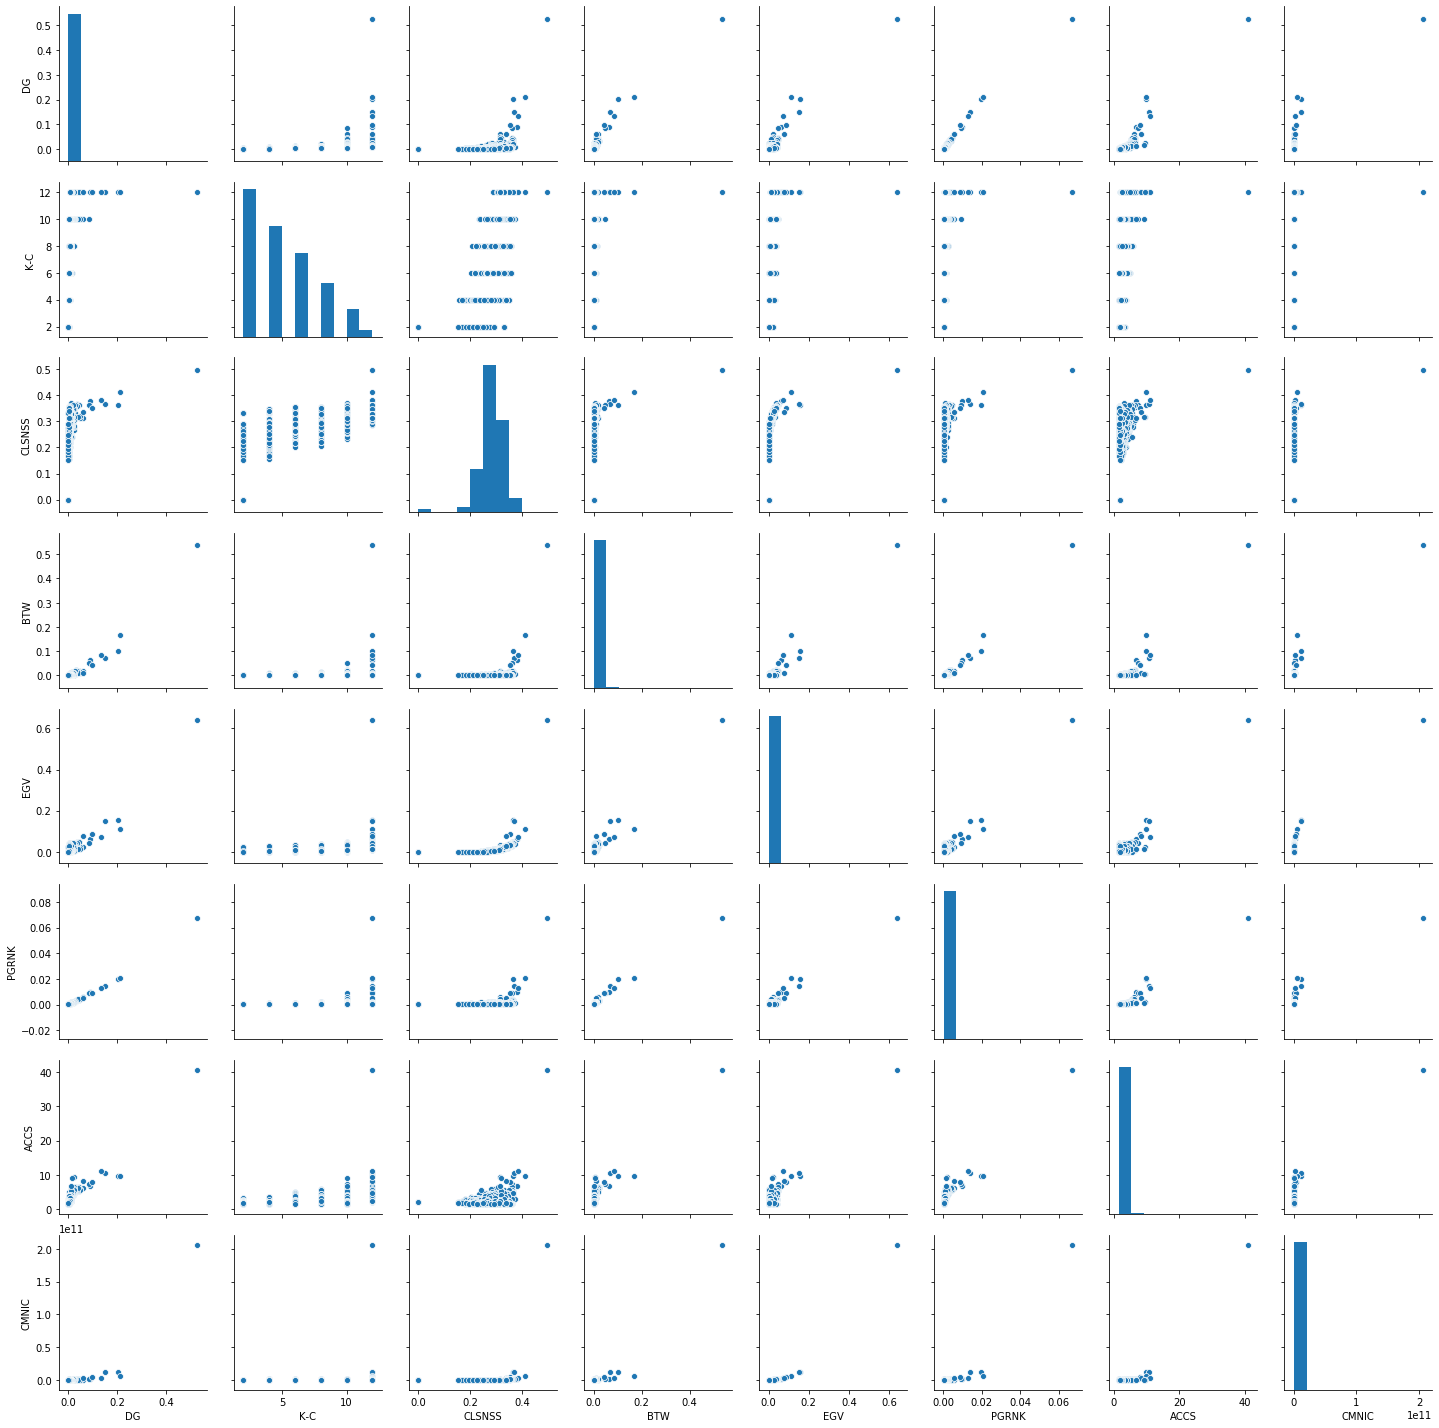

In [7]:
from scipy.linalg import expm
from scipy.sparse import csc_matrix
import seaborn as sns

def acc(G):
    N = len(G.nodes())
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    P = np.zeros((N,N), dtype = 'float')
    for i in np.arange(0, N):
        for j in np.arange(i, N):
            P[i,j] = A[i,j]/vk[i]
            P[j,i] = P[i,j]
    P2 = expm(P)/np.exp(1)
    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P2[i,j] > 0):
                acc = acc + P2[i,j]*log(P2[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc
    return vacc

def threshold_graph(G, T):
    tresholded_G = nx.Graph()
    for u, v, w in G.edges(data=True):
        if w['weight'] > T:
            tresholded_G.add_edge(u, v)
    return tresholded_G

def comm_centr(G):
    if nx.is_weighted(G):
        G = threshold_graph(G, 0)
    A = nx.adjacency_matrix(G)
    C = expm(csc_matrix(A))
    N = len(G)
    com = np.zeros(N)
    for i in range(N):
        com[i] = C[i, i]
    return com

nets_list = [celegans_neural, eroad, hams, us_airports, human_protein, celegans_2004, celegans_2007, us_powergrid, r_dep]
nets_names = ['Celegans Neural Network', 'E-Road Network', 'Hamsterster Friendships', 'US Airports', 'Human Protein',
             'Celegans 2004', 'Celegans 2007', 'US Powergrid', 'R Dependencies']

measures_dict = {}
for index, net in enumerate(nets_list):
    net.remove_edges_from(nx.selfloop_edges(net))  # removendo self-loops -- algumas medidas nao valem para grafos com self-loops
    network_name = nets_names[index]
    measures = {
                'DG': list(nx.degree_centrality(net).values()),
                'K-C': list(nx.core_number(net).values()),
                'CLSNSS': list(nx.closeness_centrality(net).values()),
                'BTW': list(nx.betweenness_centrality(net).values()),
                'EGV': list(nx.eigenvector_centrality(net, max_iter=300).values()),
                'PGRNK': list(nx.pagerank(net).values()),
                'ACCS': acc(net),
                'CMNIC': comm_centr(net)
             }
    measures_dict[network_name] = measures
    measures_dict['network_name'] = network_name
    df = pd.DataFrame(measures)
    corr = df.corr()

    plt.imshow(corr, cmap='Blues')
    plt.colorbar()
    plt.xticks(range(len(corr)), df.columns)
    plt.yticks(range(len(corr)), df.columns)
    plt.title(network_name)
    plt.show(True)


    sns.pairplot(df)
    plt.show(True)


É possível notar que, em todas as redes analisadas neste exercício, observa-se diferentes correlações entre as medidas de centralidade calculadas.

Na rede Celegans Neural Network, foi possível observar uma alta correlação entre a medida k-core e o closeness centrality. Também nota-se uma alta correlação entre o PageRank e o eigenvector centrality. Isso pode ser justificado que, de certa forma, o cálculo do PageRank é similar ao eigenvector centrality. Também pode-se notar uma alta correlação entre o PageRank com o Communicability Centrality e o Random-Walk acessibility. Uma possível explicação para esse comportamento pode ser a presença de hubs dentro da rede, lembrando que as medidas de centralidade citadas dão menos importância aos hubs presentes (como o k-core, por exemplo). É possível notar um comportamento parecido com a rede Eroad, tendo em mente que redes viárias também apresentem uma quantidade significativa de hubs, bem como redes biológicas. A correlação entre o K-core e o grau pode ser observada em quase todas as redes biológicas colocadas neste exemplo.

Para a rede Hamsterter Friendships, nota-se que o grau está relacionado com quase todas as outras medidas de centralidade. Isso pode ser tomado como um indício de que, em redes sociais, o grau pode ser um bom indicador de centralidade, já que, de certa forma, substitui quase todas as outras medidas (pois há correlação entre o grau e as outras).

Em todas as redes, observa-se correlação com característica linear ou não linear entre as medidas analisadas para todas as redes deste exemplo. Durante a análise de redes complexas, deve-se ter em mente que as medidas em questão podem ser correlacionadas, já que algumas partem das mesmas premissas para o cálculo, ou usam de métodos similares. A análise de correlação é importante para se retirar conclusões e indícios sobre a característica da estrutura da rede.



# Exercício 2

In [2]:
ny = nx.read_edgelist("newyork_edge_list.txt", nodetype=int)
ny=sorted(nx.connected_component_subgraphs(ny), key = len, reverse=True)
ny=ny[2]
sp = nx.read_edgelist("saopaulo_edge_list.txt", nodetype=int)
sp=sorted(nx.connected_component_subgraphs(sp), key = len, reverse=True)
sp=sp[1]
to = nx.read_edgelist("tokyo_edge_list.txt", nodetype=int) 
to=sorted(nx.connected_component_subgraphs(to), key = len, reverse=True)
to=to[1]
fl = nx.read_edgelist("florida1.txt", nodetype=int, data=(('weight',float),)) 
min_weight = 1.0
flo = nx.Graph()
for (u,v,w) in fl.edges(data=True):
    if w['weight'] > min_weight :
        flo.add_edge(u, v, weight=1)
labels = flo.nodes()

### Funções para construir os histogramas 

In [15]:
# (i) Degree

def h_degree(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    plt.figure(figsize=(6,4))
    plt.hist(vk, density=True)
    plt.title("Distribution of the Degree Centrality", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.xlabel("Degree Centrality (k)", fontsize=20)
    #plt.grid(True)
    plt.show(True)

# (ii) Closeness Centrality 

def h_clc(G):
    clc = dict(nx.closeness_centrality(G))
    clc = list(clc.values())
    clc = np.array(clc)
    plt.figure(figsize=(6,4))
    plt.hist(clc, density=True)
    plt.title("Distribution of the Closeness Centrality", fontsize=20)
    plt.ylabel("P(CLC)", fontsize=20)
    plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
    plt.show(True)
    
# (iii) Betweenness Centrality

def h_bc(G):
    bc = dict(nx.betweenness_centrality(G))
    bc = list(bc.values())
    bc = np.array(bc)
    plt.figure(figsize=(6,4))
    plt.hist(bc, density=True)
    plt.title("Distribution of the Betweenness Centrality", fontsize=20)
    plt.ylabel("P(BC)", fontsize=20)
    plt.xlabel("Betweenness Centrality (BC)", fontsize=20)
    plt.show(True)
    
# Função para plotar os três gráficos

def hist(G):
    h_degree(sp)
    h_clc(sp)
    h_bc(sp)

### New York

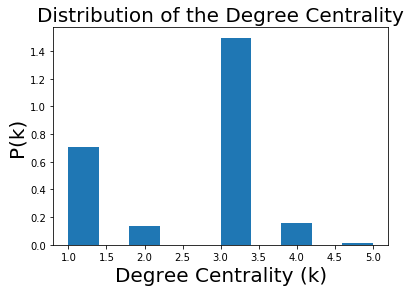

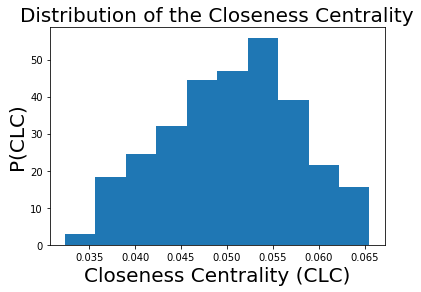

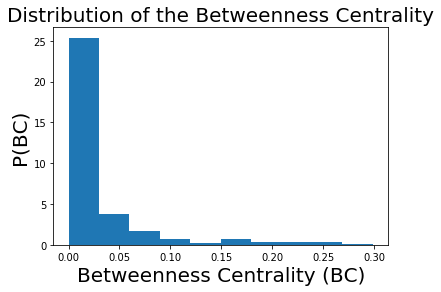

In [19]:
hist(ny)

### São Paulo

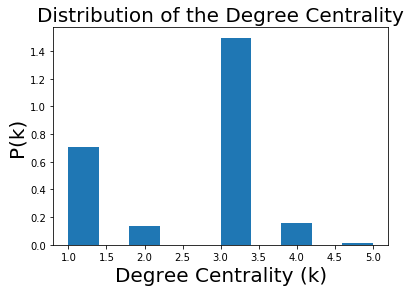

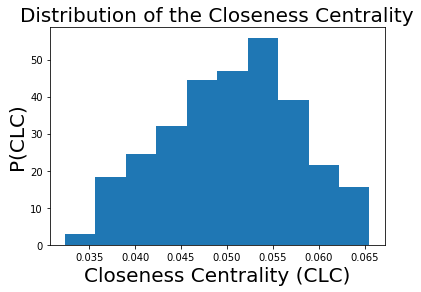

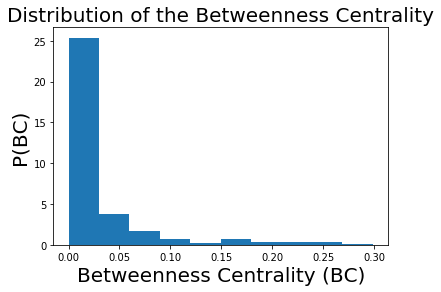

In [16]:
hist(sp)

### Tokyo

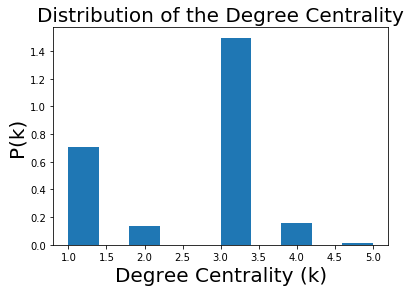

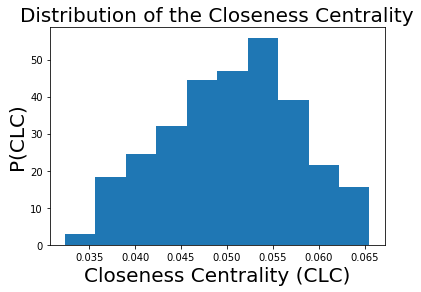

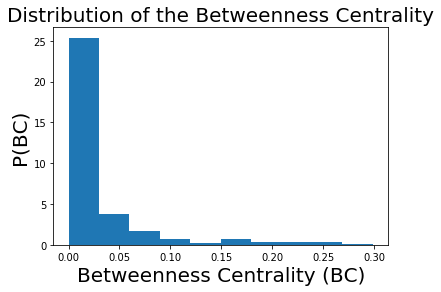

In [17]:
hist(to)

### Florida

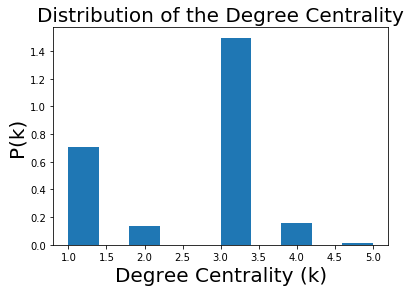

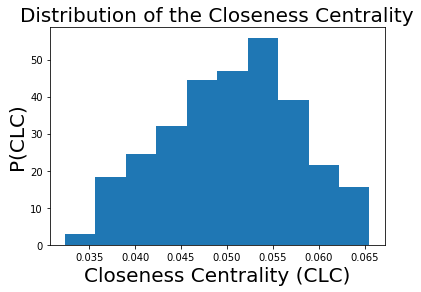

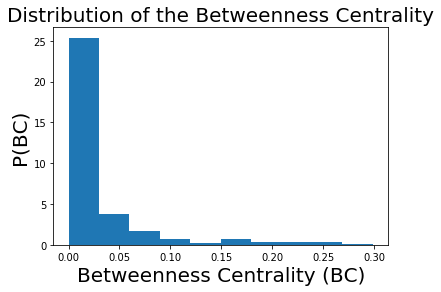

In [18]:
hist(fl)

## Exercício 3

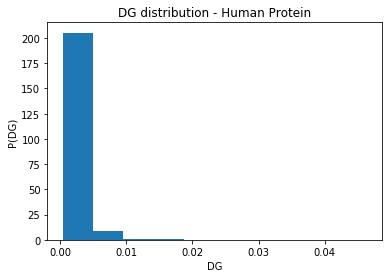

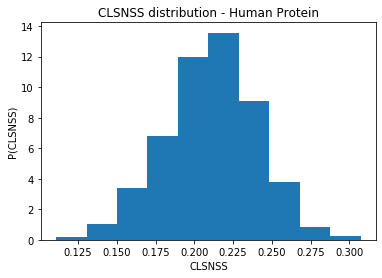

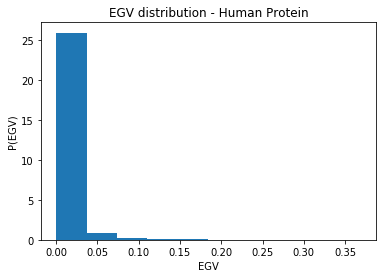

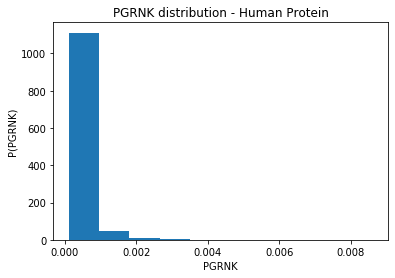

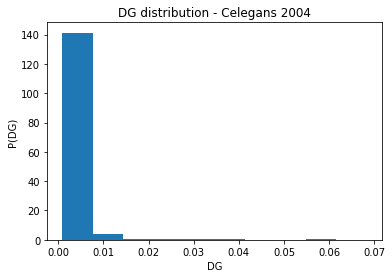

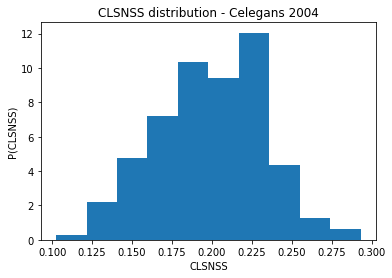

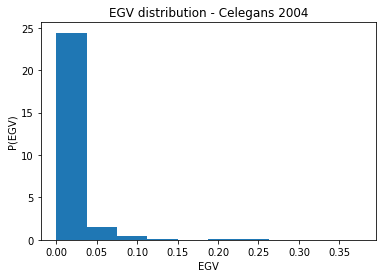

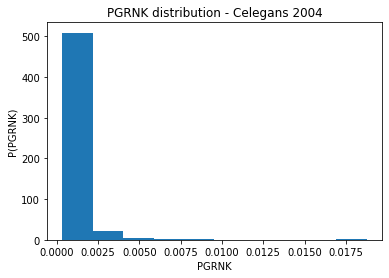

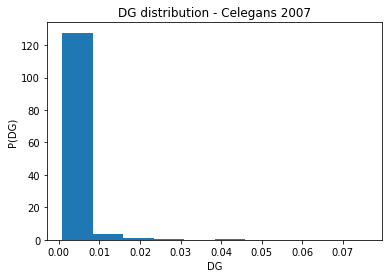

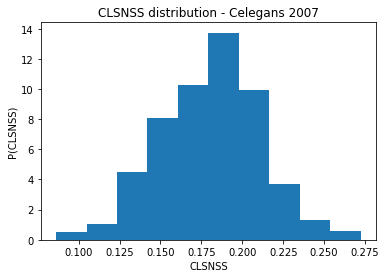

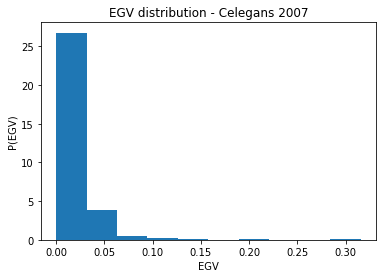

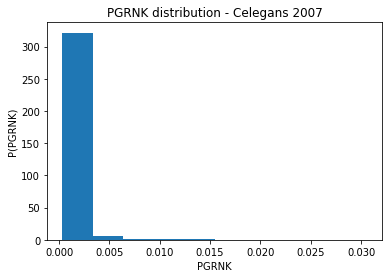

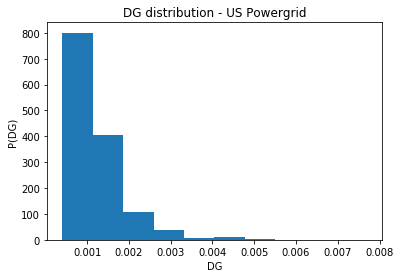

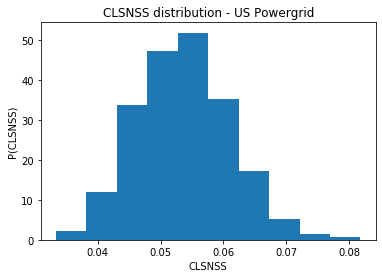

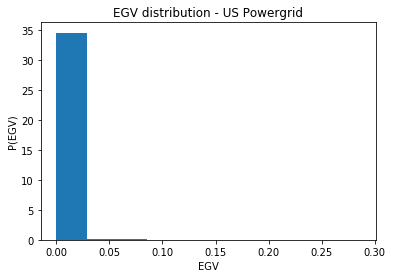

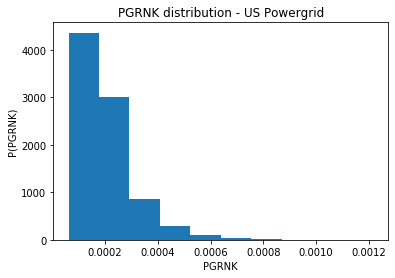

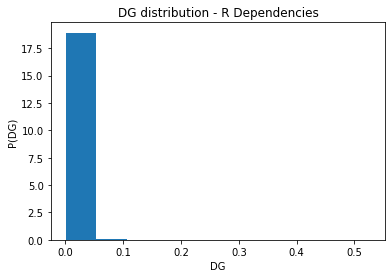

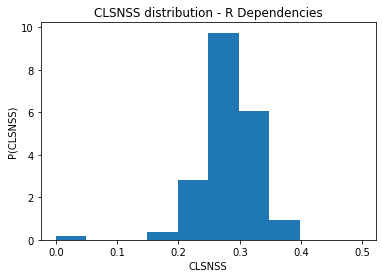

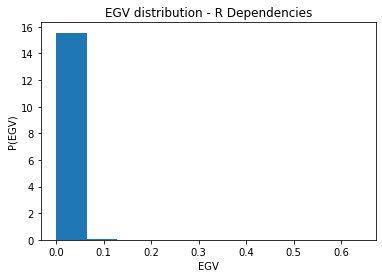

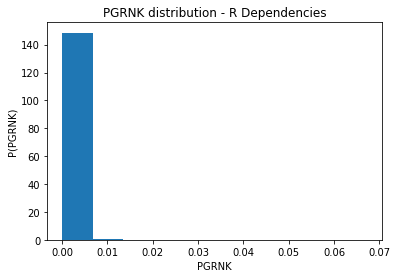

In [15]:
desired_networks = ['Human Protein', 'Celegans 2004', 'Celegans 2007', 'US Powergrid', 'R Dependencies']
desired_measures = ['DG', 'CLSNSS', 'EGV', 'PGRNK']
for name in desired_networks:
    for measure_name, measure_data in measures_dict[name].items():
        if measure_name in desired_measures:
            plot_metric_distribution(measure_data, measure_name, name)
    
        

# for network_measures in measures_dict.items():
#     network_name, data = network_measures
#     print(data)
#     for measure_name, measure_data in data.items():
#         print(measure_data)
    
    

Há semelhanças entre redes biológicas e tecnológicas quando se analisa as medidas de centralidade. É possível notar que todas as redes apresentam poucos vértices que são centrais e muitos vértices que são pouco centrais em termos das medidas calculadas. A única medida que apresentou uma distribuição diferente foi a medida de closeness centrality, sendo que tal distribuição se assemelha a uma distribuição gaussiana. Tal fato pode ser explicado pelo fato de que o closeness centrality é calculado somente com base nas distâncias, partindo do princípio de que quanto mais próximo um vértice está dos outros, mais central ele é. É possível concluir que, como o closeness centrality é praticamente normalmente distribuído, temos que as distâncias entres os também se distribuem normalmente.

## Exercício 4



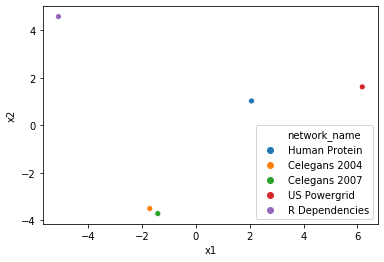

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.stats import moment, entropy



data_dict = {}
data_df = pd.DataFrame()
for net_name in desired_networks:
    for measure_name, measure_data in measures_dict[net_name].items():
        data_dict.update(
            {
                '{}_mean'.format(measure_name): np.mean(measure_data),
                '{}_std'.format(measure_name): np.std(measure_data),
                '{}_2nd_mom'.format(measure_name): moment(measure_data, moment=2),
                '{}_entr'.format(measure_name): entropy(measure_data)
            }
        )
    measures_df = pd.DataFrame(data_dict, index=[0])
    measures_df['network_name'] = net_name
    data_df = pd.concat([data_df, measures_df], ignore_index=True)



X = data_df.drop(columns='network_name')
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_reduced = pd.DataFrame(pca.fit_transform(X), columns=["x1", "x2"])
reduced_nets_data = pd.concat([X_reduced, data_df['network_name']], axis=1)
sns.scatterplot(x="x1", y="x2", hue="network_name", data=reduced_nets_data)

        







Vemos que, de fato, as redes Celegans 2004 e 2007 são bem próximas em relação as medidas de centralidade. Além disso, observa-se uma grande diferença entre redes biológicas (Celegans 2004, Celegans 2007 e Human Protein), a rede US Airports e a rede de dependências do R. Tal diferença em termos das medidas de centralidade faz sentido, já que a natureza de tais redes é completamente diferente.

## Exercício 5

In [21]:
def compute_knn(G):
    degree_dict = {node: deg for node, deg in G.degree()}
    nodes = np.array(list(degree_dict.keys()))
    k_arr = list(degree_dict.values())
    
    knn = []
    k_axis = []
    avg_neighbor_degrees = nx.average_neighbor_degree(G)
    for k in np.arange(min(k_arr), max(k_arr)):
        k_degree_nodes = [int(elem) for elem in nodes[k == k_arr]]
        if len(k_degree_nodes):
            knn += [sum(k_degree_nodes) / len(k_degree_nodes)]
            k_axis += [k]
    return k_axis, knn
    
def plot_knn(k, knn, G):
    plt.scatter(k, knn)
    plt.xlabel("k")
    plt.ylabel("knn(k)")
    rho = corrcoef(k, knn)[0,1]
    slope, intercept = np.polyfit(k, knn, 1)
    print("Rho : {} ; Intercept : {} ; Slope: {} ; Assortativity: {}\n".format(
        rho, intercept, slope, nx.degree_assortativity_coefficient(G))
    )
    
    # Drawing line
    x = np.arange(min(k), max(k), step=0.2)
    y = [slope*xx + intercept for xx in x]
    
    plt.plot(x, y, 'r')
    plt.show(True)

### E-Road

Rho : -0.964278568748767 ; Intercept : 816.7785021069882 ; Slope: -90.97409131024762 ; Assortativity: 0.09003981380055641



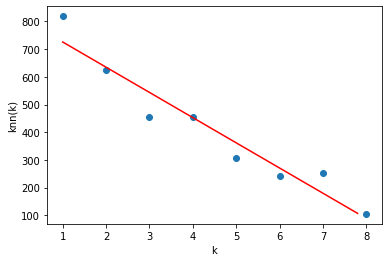

In [18]:
k, knn = compute_knn(eroad)
plot_knn(k, knn, eroad)

## Celegans Neural Network


Rho : -0.3790505058059091 ; Intercept : 167.65456159031558 ; Slope: -0.9294030571368939 ; Assortativity: -0.2327155644086791



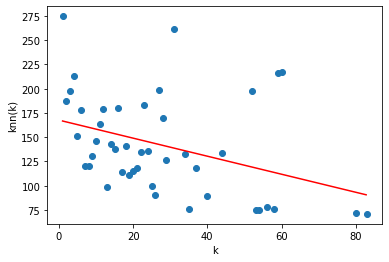

In [19]:
k, knn = compute_knn(celegans_neural)
plot_knn(k, knn, celegans_neural)

## US Airport Network

Rho : -0.6965325538257647 ; Intercept : 514.5532803289743 ; Slope: -2.0461548053622236 ; Assortativity: -0.11340155515827592



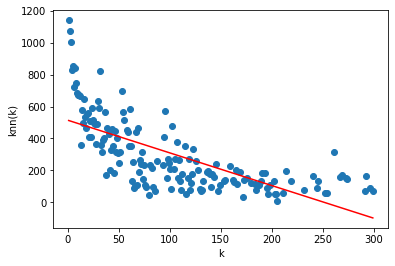

In [20]:
k, knn = compute_knn(us_airports)
plot_knn(k, knn, us_airports)

### Human protein network

Rho : -0.6123346715129482 ; Intercept : 832.0979690969625 ; Slope: -11.62508470106537 ; Assortativity: -0.13655973250936002



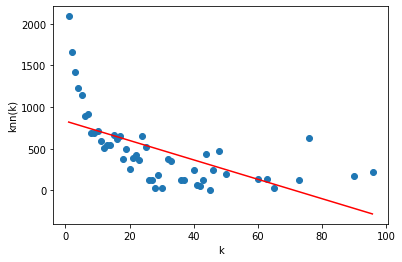

In [21]:
k, knn = compute_knn(human_protein)
plot_knn(k, knn, human_protein)

## Exercício 6

C:\Users\Leonardo\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


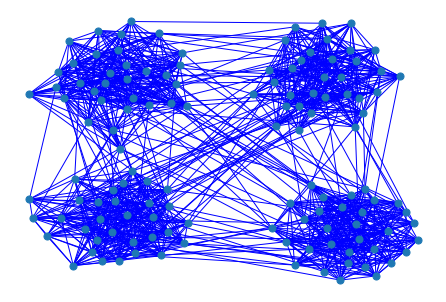

In [22]:
from networkx.algorithms.community import LFR_benchmark_graph
from itertools import combinations

def normalized_mutual_information(comms):
    N_comms = len(comms)
    comm_idxs_combinations = combinations( list( range( N_comms )), r=2)
    P_joint = np.zeros((N_comms, N_comms))
    P = np.zeros(N_comms)
    H = np.zeros(N_comms)
    N_nodes = sum( [len(c) for c in comms] ) 
    
    for i in range(N_comms):
        P[i] = len(comms[i]) 
#         H[i] = shannon_entropy(comms[i])
#     print(H)
        
    for idx1, idx2 in comm_idxs_combinations:
        P_joint[idx1][idx2] = sum(comms[idx1] == comms[idx2]) / ( len(comms[idx1] * len(comms[idx2])) )
        P_joint[idx2][idx1] = P_joint[idx1][idx2]
    
    # nao esta normalizada!
    I = sum( [ P_joint[idx1][idx2] * math.log(P_joint[idx1][idx2]) / (P[idx1] * P[idx2])
              for idx1, idx2 in comm_idxs_combinations] )
    
    return I
        
        
        

N = 128
tau1 = 3
tau2 = 1.5
mu = 0.04
k = 16
minc = 32
maxc = 32
G = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, nodecolor='r', edge_color='b', 
        node_size=50, font_size=16,  width=1,pos = pos)
plt.show(True)

### Netcarto

### Fastgreedy

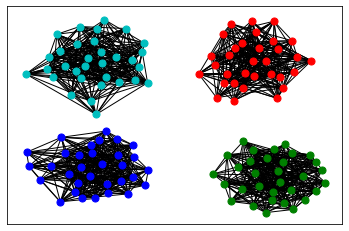

Modularity : 0.6507990505232767


In [23]:
from networkx.algorithms.community import greedy_modularity_communities, label_propagation_communities, girvan_newman
from networkx.algorithms.community.quality import modularity

comms = list(greedy_modularity_communities(G))
comms = [np.array(list(c)) for c in comms]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for index, cm in enumerate(comms):
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[index], with_labels = False, node_size=50)
plt.show(True)

# normalized_mutual_information(comms)
mod = modularity(G, comms)
print("Modularity : {}".format(mod))



### Label propagation

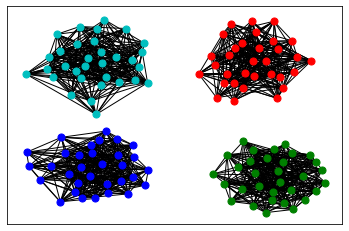

Modularity : 0.6507990505232767


In [24]:
comms = list(label_propagation_communities(G))
comms = [np.array(list(c)) for c in comms]

for index, cm in enumerate(comms):
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[index], with_labels = False, node_size=50)
plt.show(True)

mod = modularity(G, comms)
print("Modularity : {}".format(mod))


### Girvan Newman

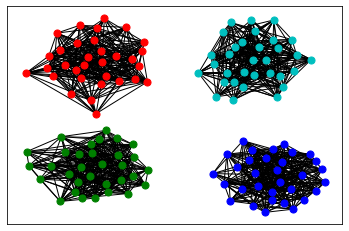

In [25]:
comms = girvan_newman(G)
k = 4
for i in arange(0, k-1):
    next_level_communities = next(comms)
c = sorted(map(sorted, next_level_communities))
aux = 0
for cm in c:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.show(True)

# mod = modularity(G, comms)
# print("Modularity : {}".format(mod))

### Louvain

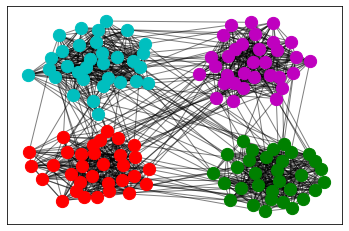

In [26]:
from community import community_louvain

partition = community_louvain.best_partition(G)
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# mod = modularity(G, partition)
# print("Modularity : {}".format(mod))

### Exercício 7

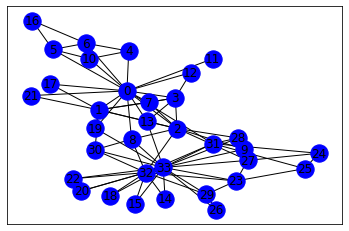

In [27]:
G = nx.karate_club_graph()
G = G.to_undirected()
G = nx.convert_node_labels_to_integers(G, first_label=0)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, node_color='b')
plt.show(True)

### Fastgreedy

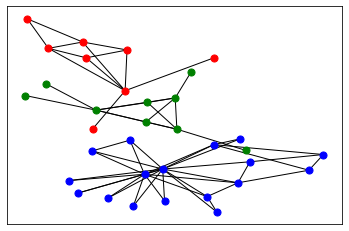

Modularity : 0.3806706114398414


In [28]:
comms = list(greedy_modularity_communities(G))
comms = [np.array(list(c)) for c in comms]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for index, cm in enumerate(comms):
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[index], with_labels = False, node_size=50)
plt.show(True)

# normalized_mutual_information(comms)
mod = modularity(G, comms)
print("Modularity : {}".format(mod))



### Label propagation



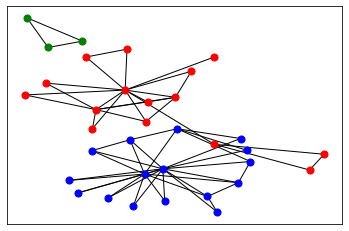

Modularity : 0.3251150558842867


In [29]:
comms = list(label_propagation_communities(G))
comms = [np.array(list(c)) for c in comms]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for index, cm in enumerate(comms):
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[index], with_labels = False, node_size=50)
plt.show(True)

# normalized_mutual_information(comms)
mod = modularity(G, comms)
print("Modularity : {}".format(mod))



### Girvan Newman

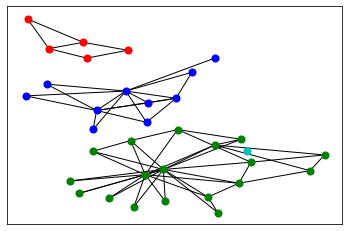

In [30]:
comms = girvan_newman(G)
k = 4
for i in arange(0, k-1):
    next_level_communities = next(comms)
c = sorted(map(sorted, next_level_communities))
aux = 0
for cm in c:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.show(True)

# mod = modularity(G, comms)
# print("Modularity : {}".format(mod))

### Louvain

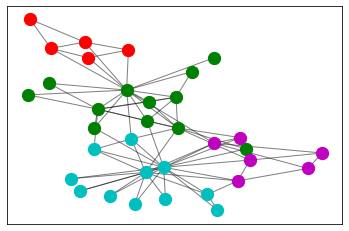

Modularity : 0.41880341880341804


In [31]:
from community import community_louvain

def louvain(G, draw=False):
        partition = community_louvain.best_partition(G)
        #drawing
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

        #drawing
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
        size = float(len(set(partition.values())))
        count = 0.
        comms = []
        for com in set(partition.values()) :
            count = count + 1.
            list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
            comms += [list_nodes]
            if draw:
                nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
        if draw:
            nx.draw_networkx_edges(G, pos, alpha=0.5)
            plt.show()
        return comms


comms = louvain(G, draw=True)
mod = modularity(G, comms)
print("Modularity : {}".format(mod))




## Exercício 8

In [1]:
from networkx.algorithms.community import LFR_benchmark_graph
from sklearn.metrics import mutual_info_score
from community import community_louvain
from networkx.algorithms import community

ModuleNotFoundError: No module named 'community'

In [2]:
nmi_fast = []
nmi_lp=[]
nmi_cgn = []
nmi_lou = []

for mu in np.arange(0.1,0.9,0.01):
    N = 1000
    tau1 = 3
    tau2 = 1.5
    mu = mu
    minc = 40
        
    G = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_community=minc, average_degree=5, seed = 10)
    
    fast = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
    fast_2 = ordenar(fast)
    lp = nx.algorithms.community.label_propagation.label_propagation_communities(G)
    lp_2 = ordenar(lp)
#    communities = list(community.centrality.girvan_newman(G))
    partition = community_louvain.best_partition(G)
    louvain = []
    for com in set(partition.values()) :
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        louvain.append(list_nodes)
    lovain_2 = ordenar(louvain)
    
    true_communities = list({frozenset(G.nodes[v]['community']) for v in G})
    true = ordenar(true_communities)
    
    nmi_fast.append(mutual_info_score(true, fast_2))
    nmi_lp.append(mutual_info_score(true, lp_2))
#   nmi_cgn.append(mutual_info_score(true_communities, communities))
    nmi_lou.append(mutual_info_score(true, lovain_2))

NameError: name 'np' is not defined

In [ ]:
plt.plot(np.arange(0,0.8,0.01), nmi_fast, label = "fast")
plt.plot(np.arange(0,0.8,0.01), nmi_lp, label = "lp")
plt.plot(np.arange(0,0.8,0.01), nmi_lou, label = "louvain")
plt.legend()

## Exercício 9

In [32]:
desired_networks = [eroad, celegans_neural, us_airports, human_protein]
names = ['eroad', 'clgs_neural', 'us_airpts', 'human_protein']
desired_methods = [
    greedy_modularity_communities,
    label_propagation_communities,
    louvain,        
]
methods_names = ['fastgreedy', 'labelprop', 'louvain']

measures_dict_list = []
for index, net in enumerate(desired_networks):
    
    # Preprocessing graph
    net = nx.Graph(net)
    if nx.is_weighted(net):
        net = threshold_graph(net, 0)
    if nx.is_directed(net):
        net.to_undirected()
    net.remove_edges_from(nx.selfloop_edges(net))
    
    # Computing first measures
    net_measures = {}
    net_measures.update(
        {
            'network_name': names[index],
            'avg_deg': np.mean( [v[1] for v in net.degree()] ),
            'deg_assort': nx.degree_assortativity_coefficient(net),
            'shts_path_l': nx.average_shortest_path_length(net)    
        }
    )
    
    # Computing modularity for each desired method
    for method_index, method in enumerate(desired_methods):
        comms = list(method(net))
        net_measures.update({
            'mod_{}'.format(methods_names[method_index]): modularity(net, comms)
        })
    
    measures_dict_list += [net_measures]
        

In [33]:
# Creating dataframe from dict list
data_df = pd.DataFrame(measures_dict_list) 
data_df

,network_name,avg_deg,deg_assort,shts_path_l,mod_fastgreedy,mod_labelprop,mod_louvain
0,eroad,2.512031,0.090040,18.395146,0.864018,5.446969e-01,0.865246
1,clgs_neural,14.464646,-0.163199,2.455319,0.369201,3.022037e-17,0.393893
2,us_airpts,21.900763,-0.113402,3.115164,0.310566,2.093998e-01,0.345394
3,human_protein,4.316924,-0.136560,4.839802,0.615328,4.947070e-01,0.637380


conclusão (?) : redes cuja assortatividade é maior é módulo (desassortativas ou assortativas) apresentam menores valores de moduaridade ? Ou seja, redes sem estruturas assortativas são mais difíceis de separar em comunidades através dos métodos apresentados (??)

## Exercício 10: 
For the Zachary Karate Club network, obtain the scatterplot of knn(k) X k and calculate the Pearson correlation coefficient between these two measures. Compare it with the assortativity coefficient. Comment the results.

Rho : -0.3019323088296628 ; Intercept : 17.275213971778857 ; Slope: -0.6197952810548236 ; Assortativity: -0.47561309768461457



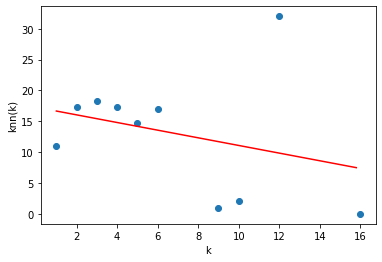

In [22]:
G = nx.karate_club_graph()
G = G.to_undirected()
G = nx.convert_node_labels_to_integers(G, first_label=0)
k, knn = compute_knn(G)
plot_knn(k, knn, G)